In [1]:
import joblib

from data import load_train_test_sets
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
%matplotlib inline

In [2]:
final_model = joblib.load('../models/final_model.clf')
final_model

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('description_bow',
                                                  CountVectorizer(max_df=0.05,
                                                                  min_df=500,
                                                                  stop_words={'english'}),
                                                  'Description'),
                                                 ('title_bow',
                                                  CountVectorizer(max_df=0.1,
                                                                  min_df=500,
                                                                  stop_words={'english'}),
                                                  'Name')])),
                ('svd', TruncatedSVD(n_components=50)),
                ('classifier', LogisticRegression(random_state=42))])

In [3]:
X_train, X_test, y_train, y_test = load_train_test_sets(debug=True)

Proportion of popular books in the dataset: 0.07
75122


In [4]:
y_pred = final_model.predict(X_train)


In [5]:
X_train

,Name,Authors,PublishYear,Publisher,Rating,PagesNumber,TotalReviews,Description
238400,Digital Soldiers: The Evolution of High-Tech W...,James F. Dunnigan,1996,"[""St. Martin's Press""]",3.57,309.0,14,Digital Soldiers is destined to become the bib...
738753,Social Constructions of Nationalism in the Mid...,Fatma Müge Göçek,2002,['State University of New York Press'],5.00,288.0,1,While Middle Eastern nationalism is most often...
545000,Mitch Murray's One-Liners for Wedding Speeches...,Mitch Murray,2008,['Foulsham'],3.33,128.0,3,A successful speech depends very much on how t...
895504,The Monkey King,Kathryn Wesley,2001,['Kensington'],4.20,288.0,15,"Hallmark Entertainment Books presents ""The Mon..."
749924,Spiders of Panama,Wolfgang Nentwig,1993,['CRC Press'],0.00,288.0,0,in collaboration with Bruce Cutler and Stefan ...
...,...,...,...,...,...,...,...,...
110268,Between Past and Future: The Roma of Central a...,Will Guy,2002,['University Of Hertfordshire Press'],4.33,429.0,3,The Roma (or gypsies) of Central and Eastern E...
259178,Echoes of Valor,Karl Edward Wagner,1987,['Tor Books'],3.85,288.0,65,Three great realms of heroic adventure by a tr...
131932,Brit-Myth: Who Do the British Think They Are?,Chris Rojek,2008,['Reaktion Books'],2.92,224.0,13,The world sees Britain through the antics of <...
671155,Reactive Extrusion Systems,Leon P.B.M. Janssen,2004,['CRC Press'],0.00,200.0,0,Citing recently realized applications for extr...


In [6]:
X_train['y'] = y_train
X_train['y_pred'] = y_pred
training_errors = X_train.loc[y_pred != y_train]

## False positive analysis

In [7]:
training_errors_fp = training_errors[training_errors.y_pred & ~training_errors.y]

In [8]:
training_errors_fp.head(10)

,Name,Authors,PublishYear,Publisher,Rating,PagesNumber,TotalReviews,Description,y,y_pred
503256,"Love, You Should've Had My Back",Quaneysha Poindexter,2006,['Trafford Publishing'],3.000,239.0,1,Lani never knew true love until she met Love. ...,False,True
247483,Done for a Dime,David Corbett,2003,"['Ballantine Books', 'Ballantine Books']",3.775,368.0,72,"David Corbett’s first book, <b>The Devil’s Red...",False,True
607276,Outback Heart,Joanne van Os,2005,['Random House Australia'],3.870,328.0,75,Joanne van Os was just twenty-two when she met...,False,True
741246,Solace Of Sin,Catherine Cookson,1999,['Corgi'],3.840,288.0,319,From the first moment she saw the house on the...,False,True
142426,California's Over,Louis B. Jones,1997,"['Vintage', 'Random House Value Publishing', '...",3.660,329.0,47,<i>California's Over</i> leads us down an unma...,False,True
436164,"Irène Némirovsky: el mirador, memorias soñadas",Élisabeth Gille,1999,['Circe'],3.890,291.0,243,A New York Review Books Original <br /> <br /...,False,True
407945,I've Been Watching You: The South Louisiana Se...,Susan D. Mustafa,2005,"['Authorhouse', 'Authorhouse']",3.870,312.0,429,"['""Rigor mortis had set in by the time police ...",False,True
995336,Twice Burned,Kit Craig,1993,['Little Brown and Company'],3.210,286.0,47,"The Archer twins are fourteen, beautiful, dang...",False,True
908157,The Pagan House,David L. Flusfeder,2008,['Harper Perennial'],2.260,416.0,34,The much-anticipated new novel from the acclai...,False,True
33193,"A Verdict of Love (Family Secrets, #6)",Jenna Mills,2003,['Silhouette'],3.380,256.0,48,"<b>SUBJECT: </b>Eric Jones, high-profile inves...",False,True


In [9]:
tn = ~X_train.y & ~X_train.y_pred
X_train[tn].TotalReviews.describe()

count    886660.000000
mean         27.773180
std          67.604428
min          -2.000000
25%           0.000000
50%           3.000000
75%          18.000000
max         500.000000
Name: TotalReviews, dtype: float64

In [10]:
training_errors_fp.TotalReviews.describe()

count    4514.000000
mean      109.053168
std       126.487681
min         0.000000
25%        13.000000
50%        54.000000
75%       165.750000
max       500.000000
Name: TotalReviews, dtype: float64

In [11]:
X_train['proba'] = final_model.predict_proba(X_train)[:, 1]

/Users/andreapereira/projects/codeop_data_science_bootcamp/goodreads_popularity_prediction/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/andreapereira/projects/codeop_data_science_bootcamp/goodreads_popularity_prediction/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/andreapereira/projects/codeop_data_science_bootcamp/goodreads_popularity_prediction/venv/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


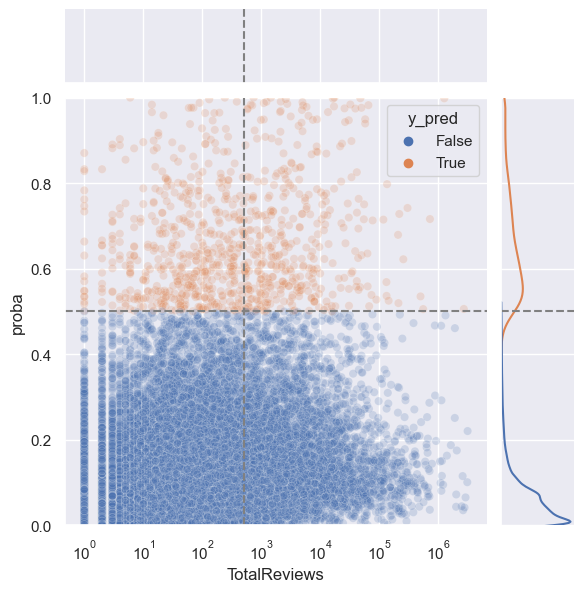

In [12]:
g = sns.JointGrid(data=X_train.sample(100000), x='TotalReviews', y='proba', hue='y_pred', ylim=(0,1))
g.ax_joint.set_xscale('log')
g.plot_joint(sns.scatterplot, alpha=0.2)
g.plot_marginals(sns.kdeplot, common_norm=False)
g.refline(x=500, y=0.5)

Let's focus on books with lowest amount of reviews but predicted as True

In [13]:
training_errors_fp.sort_values('TotalReviews').head(30)

,Name,Authors,PublishYear,Publisher,Rating,PagesNumber,TotalReviews,Description,y,y_pred
105326,Behind the Eyes of Dorian Gray,Beth A. Carpenter,2005,['Archebooks Publishing'],0.0,200.0,0,One nameless portrait. One best-selling author...,False,True
355462,Grandma and Art Got Me Off the Farm,Ethel Christensen,2007,['Xlibris Corporation'],0.0,280.0,0,Abandoned by her father and rejected by her mo...,False,True
318689,Forlorn: An Eric Geiger Novel,Jeffrey McGraw,2006,['iUniverse'],0.0,232.0,0,Unrequited love isn't bittersweet. Unrequited ...,False,True
584994,Norman's Assault,Nicholas D. Brown,2007,"['Authorhouse', 'Authorhouse']",0.0,316.0,0,"[""Norman D Beech enters the world on D-Day jus...",False,True
270448,"Emile, Ou, Les Figures De La Fiction",Laurence Mall,2002,['Voltaire Foundation in Association with Live...,0.0,344.0,0,"Qu'est-ce qu'<em>Emile, ou De l'�ducation</em>...",False,True
942206,The Story of Our Lady of Guadalupe Empress of ...,C. Lourdes Walsh,2003,['Trafford Publishing'],0.0,52.0,0,The Story of Our Lady of Guadalupe: Empress of...,False,True
1063898,Zwarte Indianen En Hun Symbolen Het Magisch Re...,V. Neckebrouck,2002,['Peeters'],0.0,916.0,0,Dit boek is gebaseerd op de resultaten van lan...,False,True
487724,Life on the Line,Kennebrew Surant,2007,['Xlibris Corporation'],0.0,320.0,0,Danny Summersend is determined to find out the...,False,True
504947,"Lula, La Izquierda Al Divan",Ceferino Reato,2006,['Unknown'],0.0,376.0,0,Con el pretexto central de ocuparse de Luiz In...,False,True
160258,Chief Blackbear,Matt Kilrain,2005,['iUniverse'],0.0,236.0,0,"At the age of twelve, Joe Blackbear, the son o...",False,True


In [35]:
cf = final_model.steps[0][1]
cvec = cf.transformers_[0][1]

In [39]:
sample

"One nameless portrait. One best-selling author. A dark revenant. A chance for redemption? The gentlemen with the wicked, brown eyes, the beautiful young man, whose image had been immortalized more than two centuries before by the artist's brush, seemed much more than pigment and paint and can-vas. When best-selling author Rachael Lafferty sees the painting on the auction block, the beautiful young man captures her heart and her writer's imagination. She knows she has to have the painting-it would make the Victorian townhouse she was restoring complete... More complete than she ever could have guessed, for when she brings her prize home and lovingly hangs it on the wall, Dorian Gray's trapped soul steps out of the painting and into her life. Cold. Dark. His much-deserved hell. Those were the only things Dorian had known for more than a century. But, now, impossibly, he finds himself in his own home once more, though a century has passed. He feels warmth once more. And love-his love for